# Newton Rhapson Method 


A Newton step in the context of the Newton-Raphson method is a process for refining an estimate of a root of a function. It's defined by the formula $x_{i} = x_{i-1} - \frac{g(x_{i-1})}{g'(x_{i-1})}$, where $x_{i}$ is the current estimate, $x_{i-1}$ is the previous estimate, $g(x)$ is the function whose root is being estimated, and $g'(x)$ is the derivative of that function. The method iteratively applies this step, improving the estimate each time, until the error in the estimate is smaller than a specified tolerance.


We apply the approximation for a function $f(x) = x^2 - 2$ with an initial guess of $x_0 = 1.5$ to estimate its root $\sqrt{2}$.



In [6]:
import numpy as np

f = lambda x: x**2 - 2
f_prime = lambda x: 2*x
newton_raphson = 1.4 - (f(1.4))/(f_prime(1.4)) # first iteration only

print("newton_raphson =", newton_raphson)
print("sqrt(2) =", np.sqrt(2))


newton_raphson = 1.4142857142857144
sqrt(2) = 1.4142135623730951


We define a function 𝑚𝑦_𝑛𝑒𝑤𝑡𝑜𝑛(𝑓,𝑑𝑓,𝑥0,𝑡𝑜𝑙), where the output is an estimation of the root of f, f is a function object 𝑓(𝑥), df is a function object to 𝑓′(𝑥), x0 is an initial guess, and tol is the error tolerance. The error measurement should be |𝑓(𝑥)|.


In [10]:
def my_newton(f, df, x0, tol):
    # output is an estimation of the root of f 
    # recursive implementation
    if abs(f(x0)) < tol:
        return x0
    else:
        return my_newton(f, df, x0 - f(x0)/df(x0), tol)
    

Assuming an error tolerance of 1e-6, we deploy my_newton to compute sqrt(2)

In [8]:
estimate = my_newton(f, f_prime, 1.5, 1e-6)
print("estimate =", estimate)
print("sqrt(2) =", np.sqrt(2))


estimate = 1.4142135623746899
sqrt(2) = 1.4142135623730951


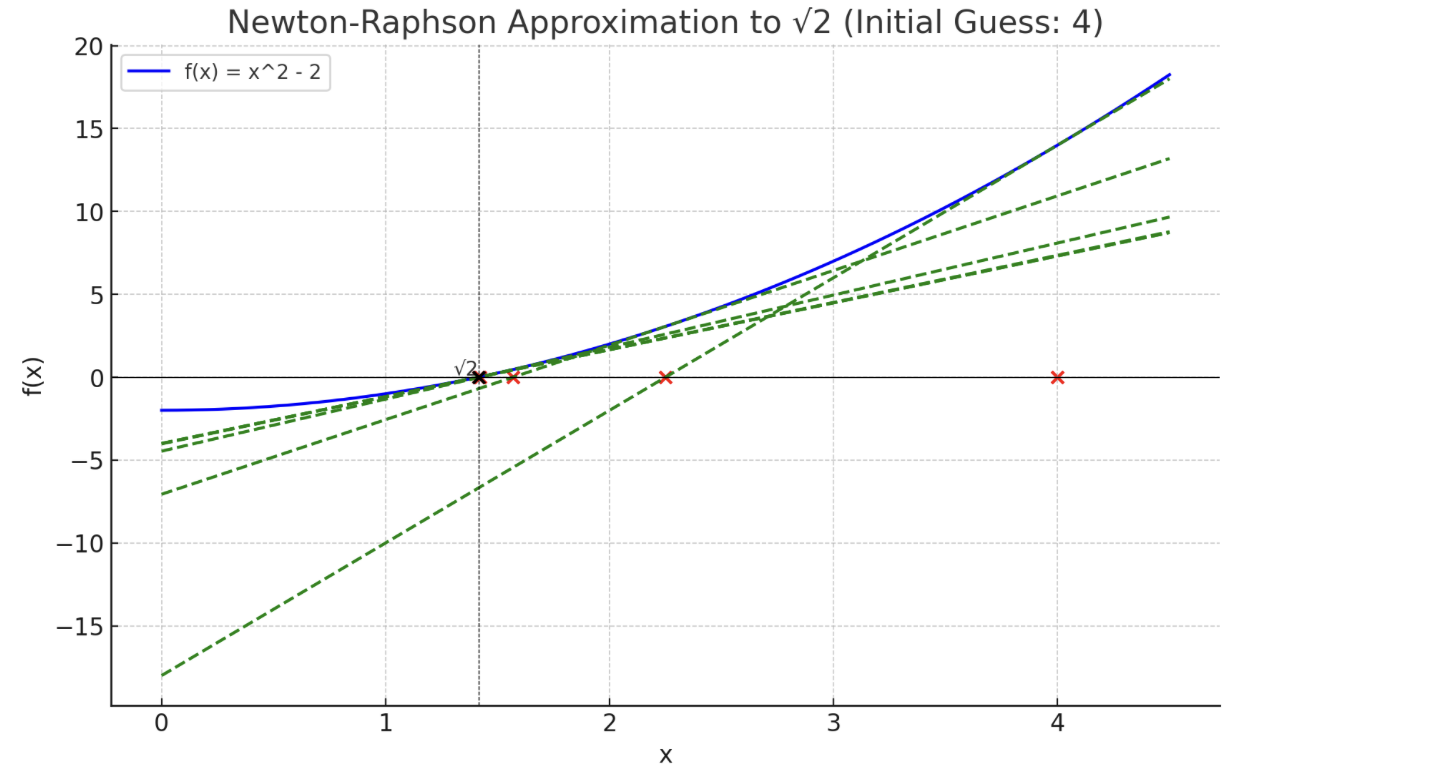

For illustrative pusposes the inital guess was changed to 4.


# Gauss-Sidel Iterative Method


Consider the set of $n$ equations in $n$ unknowns:

\begin{align}
a_{11} x_1 + a_{12} x_2 + \ldots + a_{1n} x_n &= a_{1(n+1)} \tag{1} \\
a_{21} x_1 + a_{22} x_2 + \ldots + a_{2n} x_n &= a_{2(n+1)} \tag{2} \\
a_{31} x_1 + a_{32} x_2 + \ldots + a_{3n} x_n &= a_{3(n+1)} \tag{3} \\
\vdots \\
a_{n1} x_1 + a_{n2} x_2 + \ldots + a_{nn} x_n &= a_{n(n+1)} \tag{4}
\end{align}

In the Gauss-Seidel method, $x_2^0, x_3^0, \ldots, x_n^0$ are set equal to zero and $x_1^1$ is calculated from equation (1). This value of $x_1$ and zeros are substituted for $x_3, x_4, \ldots, x_n$ in equation (2), and $x_2$ is computed from this equation. The values of $x_1^1$ and $x_2^1$, along with zeros for $x_4, x_5, \ldots, x_n$, are used in equation (3) to compute $x_3^1$. Finally, $x_1^1, x_2^1, \ldots, x_{n-1}^1$ are used in equation (4) to compute $x_n^1$. With this, the first iteration ends. In the second iteration, $x_2^1, x_3^1, \ldots, x_n^1$ are used to compute $x_1^2$. Then $x_1^2, x_3^1, \ldots, x_n^1$ are used to compute $x_2^2$, and so on. The main point to observe is that always the latest approximations for the values of variables are used in an iteration.



In [16]:
import numpy as np

def gauss_seidel_modified(A, b, tolerance=1e-10, max_iterations=1000):
    """
    Gauss-Seidel function that displays each iteration.
    
    :param A: Coefficient matrix
    :param b: Right-hand side vector
    :param tolerance: Allowed relative error in the result
    :param max_iterations: Maximum number of iterations
    :return: Solution vector x
    """
    n = len(b)
    x = np.zeros(n)  # Initial guess for the solution
    print("System of equations:")
    for row in range(n):
        equation = " + ".join([f"{A[row, col]:.0f}*x{col+1}" for col in range(n)]) + f" = {b[row]:.0f}"
        print(f"[ {equation} ]")
    print("Iteration 1:", x)
    for iter in range(1, max_iterations):
        big = 0
        for i in range(n):
            sum = 0
            for j in range(n):
                if j != i:
                    sum += A[i, j] * x[j]
            temp = (b[i] - sum) / A[i, i]
            relerror = abs((x[i] - temp) / temp) if temp != 0 else 0
            if relerror > big:
                big = relerror
            x[i] = temp
        print(f"Iteration {iter + 1}:", x)
        if big <= tolerance:
            print("Solution:", x)
            return x
    print("Does not converge within the maximum number of iterations")
    return x

# Test case:
A_test = np.array([[10, -1, 2, 0],
                   [-1, 11, -1, 3],
                   [2, -1, 10, -1],
                   [0, 3, -1, 8]], dtype=float)

b_test = np.array([6, 25, -11, 15], dtype=float)

# Call the modified Gauss-Seidel function
gauss_seidel_modified(A_test, b_test)

# Adapted from Gauss-Sidel pseudocode in Computer Oriented Numerical Methods, V. Rajaraman

System of equations:
[ 10*x1 + -1*x2 + 2*x3 + 0*x4 = 6 ]
[ -1*x1 + 11*x2 + -1*x3 + 3*x4 = 25 ]
[ 2*x1 + -1*x2 + 10*x3 + -1*x4 = -11 ]
[ 0*x1 + 3*x2 + -1*x3 + 8*x4 = 15 ]
Iteration 1: [0. 0. 0. 0.]
Iteration 2: [ 0.6         2.32727273 -0.98727273  0.87886364]
Iteration 3: [ 1.03018182  2.03693802 -1.0144562   0.98434122]
Iteration 4: [ 1.00658504  2.00355502 -1.00252738  0.99835095]
Iteration 5: [ 1.00086098  2.00029825 -1.00030728  0.99984975]
Iteration 6: [ 1.00009128  2.00002134 -1.00003115  0.9999881 ]
Iteration 7: [ 1.00000836  2.00000117 -1.00000275  0.99999922]
Iteration 8: [ 1.00000067  2.00000002 -1.00000021  0.99999996]
Iteration 9: [ 1.00000004  1.99999999 -1.00000001  1.        ]
Iteration 10: [ 1.  2. -1.  1.]
Iteration 11: [ 1.  2. -1.  1.]
Iteration 12: [ 1.  2. -1.  1.]
Solution: [ 1.  2. -1.  1.]


array([ 1.,  2., -1.,  1.])

The Gauss-Seidel method is an iterative technique for solving a square system of $n$ linear equations with unknowns $x$. This method uses the latest available values for the unknowns at each step, hence the sum $\sum_{j \neq i} A_{ij} x_j$ is computed during each iteration.


1. **Linear Equation Setup**: Each equation in the system can be written in the form:
   $$ a_{i1}x_1 + a_{i2}x_2 + \dots + a_{ii}x_i + \dots + a_{in}x_n = b_i $$
   Here, $a_{ij}$ are the coefficients of the unknowns $x_j$ in the $i$-th equation, and $b_i$ is the constant term.

2. **Isolating $x_i$**: To solve for $x_i$, we isolate it on one side of the equation. This gives:
   $$ a_{ii}x_i = b_i - \sum_{j \neq i} a_{ij}x_j $$
   Then solving for $x_i$, we get:
   $$ x_i = \frac{b_i - \sum_{j \neq i} a_{ij}x_j}{a_{ii}} $$


3. **Iterative Update**: In the iterative process of the Gauss-Seidel method, we use the most recently updated values of the unknowns. That is, if $x_j$ has been updated in the current iteration (i.e., $j < i$), then this new value is used in the sum. If it has not been updated yet (i.e., $j > i$), then the value from the previous iteration is used.

4. **Convergence Criterion**: This process iteratively updates the unknowns and ideally moves closer to the actual solution with each iteration. The convergence of the method is determined by how much the unknowns change in each iteration. If the changes are below a certain threshold (the tolerance), it is assumed that the solution has been sufficiently approximated, and the process can stop.

The iterative nature of the Gauss-Seidel method, using the most recent values of the unknowns, typically leads to faster convergence compared to methods that only use values from the previous iteration, such as the Jacobi method. However, it is important to note that convergence is not guaranteed for all systems, particularly if the matrix $A$ does not have certain properties like diagonal dominance or symmetry and positive definiteness.


# Lagrange Polynomial Interpolation

### Formalism

In the field of numerical analysis, **Lagrange polynomial interpolation** is a classical method for constructing a polynomial that exactly fits a given set of data points. This polynomial is particularly useful for approximating functions using a set of discrete points and is defined as follows:

Given a set of $(n+1)$ distinct data points $(x_i, f(x_i))$ for $i = 1, 2, ..., n+1$, the Lagrange polynomial $L_n(x)$ of degree at most $n$ that interpolates these points is given by:

$$
L_n(x) = \sum_{i=1}^{n+1} f(x_i) \cdot l_i(x)
$$

where $l_i(x)$ are the Lagrange basis polynomials, defined for each $i$ as:

$$
l_i(x) = \prod_{\substack{j=1 \\ j \neq i}}^{n+1} \frac{x - x_j}{x_i - x_j}
$$

Here, $l_i(x)$ is constructed to be $1$ at $x=x_i$ and $0$ at all other data points $x_j$ ($j \neq i$). This ensures that $L_n(x_i) = f(x_i)$ for all $i$, thus the polynomial $L_n(x)$ passes through all the given data points.

#### Properties:

- The Lagrange polynomial is unique for a given set of points.
- It does not require solving a system of equations unlike other forms of polynomial interpolation.
- Lagrange polynomials can suffer from numerical instability and high oscillation, especially for higher degrees of $n$ and unevenly spaced $x_i$.

This polynomial is generally used for theoretical analysis rather than practical computation due to its complexity for large $n$, where other methods such as spline interpolation or piecewise interpolation might be preferred.


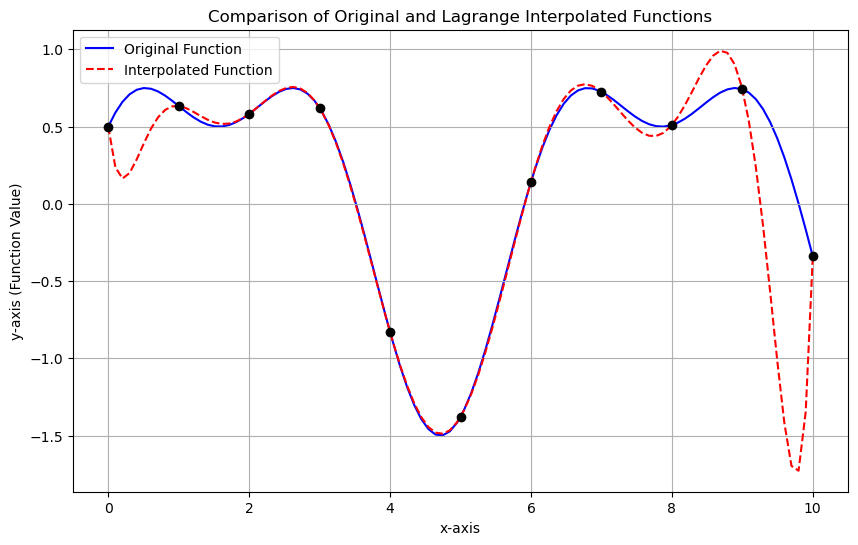

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Original function to interpolate
def original_function(x):
    """Compute the original complex function for given x values."""
    return np.sin(x) + 0.5 * np.cos(2*x)

# Data points for interpolation
x_points = np.linspace(0, 10, num=11)  # 11 points in [0, 10]
f_points = original_function(x_points)

# Implementation of the Lagrange interpolation function 
def lagrange_interpolation(x, x_points, f_points):

    n = len(x_points)
    sum = 0
    for i in range(n):
        prodfunc = 1
        for j in range(n):
            if j != i:
                prodfunc *= (x - x_points[j]) / (x_points[i] - x_points[j])
        sum += f_points[i] * prodfunc
    return sum

# Interpolating on a finer grid
x_fine = np.linspace(0, 10, num=100) 
interpolated_values = np.array([lagrange_interpolation(x, x_points, f_points) for x in x_fine])

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_fine, original_function(x_fine), label='Original Function', color='blue', zorder=1)
plt.plot(x_fine, interpolated_values, '--', label='Interpolated Function', color='red', zorder=2)
plt.scatter(x_points, f_points, color='black', zorder=3)

# Formatting the plot
plt.title('Comparison of Original and Lagrange Interpolated Functions')
plt.xlabel('x-axis')
plt.ylabel('y-axis (Function Value)')
plt.legend()
plt.grid(True)
plt.show()


# Adapted from Lagrange Polynomial Interpolation pseudocode in Computer Oriented Numerical Methods, V. Rajaraman

# Bisection Method 


### Formalism

The Intermediate Value Theorem says that if $f(x)$ is a continuous function between $a$ and $b$, and $\text{sign}(f(a)) \neq \text{sign}(f(b))$, then there must be a $c$, such that $a < c < b$ and $f(c) = 0$. This is illustrated in the following figure.

The bisection method uses the intermediate value theorem iteratively to find roots. Let $f(x)$ be a continuous function, and $a$ and $b$ be real scalar values such that $a < b$. Assume, without loss of generality, that $f(a) > 0$ and $f(b) < 0$. Then by the intermediate value theorem, there must be a root on the open interval $(a, b)$. Now let $m = \frac{a + b}{2}$, the midpoint between $a$ and $b$. If $f(m) = 0$ or is close enough, then $m$ is a root. If $f(m) > 0$, then $m$ is an improvement on the left bound, $a$, and there is guaranteed to be a root on the open interval $(m, b)$. If $f(m) < 0$, then $m$ is an improvement on the right bound, $b$, and there is guaranteed to be a root on the open interval $(a, m)$. This scenario is depicted in the following figure.

The process of updating $a$ and $b$ can be repeated until the error is acceptably low.


In [20]:
import numpy as np

def my_bisection(f, a, b, tol): 
    # approximates a root, R, of f bounded 
    # by a and b to within tolerance 
    # | f(m) | < tol with m the midpoint between a and b 
    # Recursive implementation
    
    # check if a and b bound a root
    if np.sign(f(a)) == np.sign(f(b)):
        raise Exception("The scalars a and b do not bound a root")
        
    # midpoint
    m = (a + b)/2
    
    if np.abs(f(m)) < tol:
        # base case, report m as root if abs(f(m)) is less than tol
        return m
    elif np.sign(f(a)) == np.sign(f(m)):
        # case where m is an improvement on a. 
        # Make recursive call with a = m
        return my_bisection(f, m, b, tol)
    elif np.sign(f(b)) == np.sign(f(m)):
        # case where m is an improvement on b. 
        # Make recursive call with b = m
        return my_bisection(f, a, m, tol)

$\sqrt{2}$ can be computed as the root of the function $f(x) = x^2 - 2$. Starting at $a=0$ and $b=2$, using `my_bisection` to approximate the $\sqrt{2}$ to a tolerance of $\left| f(x) \right| < 0.1$ and $\left| f(x) \right| < 0.01$.


In [21]:
f = lambda x: x**2 - 2

r1 = my_bisection(f, 0, 2, 0.1)
print("r1 =", r1)
r01 = my_bisection(f, 0, 2, 0.01)
print("r01 =", r01)

print("f(r1) =", f(r1))
print("f(r01) =", f(r01))

r1 = 1.4375
r01 = 1.4140625
f(r1) = 0.06640625
f(r01) = -0.00042724609375
